Shaivi Sanchorawala
My Task:
1. Synthesize data from Phil Shirts folder (continuum, magfield, magincl)
2. Plot the data in images
3. Use the magnetic field strength and inclination to calculate the Bz
4. Plot the calculated Bz into an image and save it
5. Concatanate the continuum, inclination, and Bz into side-by-side frames
6. Cycle through the 59 data files to create a movie displaying the evolution of penumbral filaments
7. **Additionally, consinder using the dopp data as well.

In [29]:
import numpy as np
import math
import sys
from PIL import Image

#Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

##from astropy.utils.data import get_pkg_data_filename
##image_file = get_pkg_data_filename('/sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_blapp_index.fits')

Below, I have opened and plotted the magfield, magincl, and continuum data from the 1st image.

QUESTIONS:
Read the magnetic field data:
Is the below B_ANGLE =        7.19150301274 /    the inclination?
**I believe so yes, because I did a min/max test and found that the angles ranged from 0 to 180 degrees.

In [30]:
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
magfield.info()
magfield[1].header.keys

Filename: /Users/shaivi/.astropy/cache/download/url/1bea07d76cbf5587379368cad7df7c6e/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  120 /                                                
NAXIS2  =                  384 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

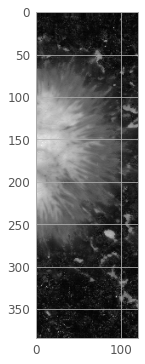

In [31]:
data_magfield = magfield[1].data
#print(data)
plt.imshow(data_magfield, cmap='gray')

In [32]:
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magincl.info()
magincl[1].header.keys

Filename: /Users/shaivi/.astropy/cache/download/url/5a8b46f7e378df09ee8f4eafa394613f/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  120 /                                                
NAXIS2  =                  384 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

0.0


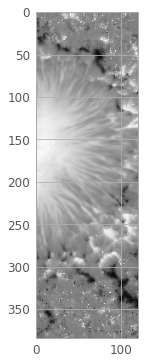

In [33]:
data_magincl = magincl[1].data
plt.imshow(data_magincl, cmap = 'gray')
print(np.min(data_magincl))

In [34]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
conti.info()
conti[1].header.keys

Filename: /Users/shaivi/.astropy/cache/download/url/09a54919bcbe3207b8d4b846fb9f2d75/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1                1 ImageHDU        49   (120, 384)   float32   
  2                1 ImageHDU        49   (120, 384)   float32   
  3                1 ImageHDU        49   (120, 384)   float32   
  4                1 ImageHDU        49   (120, 384)   float32   
  5                1 ImageHDU        49   (120, 384)   float32   
  6                1 ImageHDU        49   (120, 384)   float32   
  7                1 ImageHDU        49   (120, 384)   float32   
  8                1 ImageHDU        49   (120, 384)   float32   
  9                1 ImageHDU        49   (120, 384)   float32   
 10                1 ImageHDU        49   (120, 384)   float32   
 11                1 ImageHDU        49   (120, 384)   float32   
 12                1 ImageHDU        49   (120, 384)   float32   
 

<bound method Header.keys of XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  120 /                                                
NAXIS2  =                  384 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
PROG_VER=                  463 /                                                
SEQN_VER=                  496 /                                                
PARM_VER=                  481 /                                                

(384, 120)

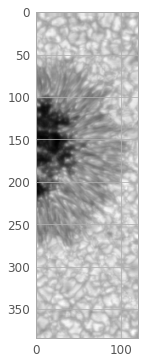

In [42]:
data_conti = conti[1].data
plt.imshow(data_conti, cmap = 'gray')
np.shape(data_conti)

Now that these images have been read and plotted in Python, I will calculate the Bz. 
I will use th formula:
bz = magfield*(cos(magincl_in_radians))

The line below converts the magnetic inclination to radians and then takes the cosine of it.

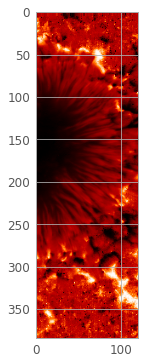

In [36]:
#print(data_magincl) - this is for troubleshooting
mag_incl_cos_rad = np.cos(np.array(np.deg2rad(data_magincl)))
plt.imshow(mag_incl_cos_rad)

The line below multiplies the cos found above with the field strenghth to find the Bz. Also plots the Bz for the first data file.

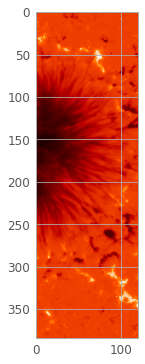

In [37]:
Bz =  data_magfield*mag_incl_cos_rad
plt.imshow(Bz)

In order to verify that the array multiplication that was executed was element-multiplication and not matrix multiplication, a little experiment wiht basic arrays was done to verify that the values were multiplied pixel-by-pixel.

[[  0   0]
 [200 600]]


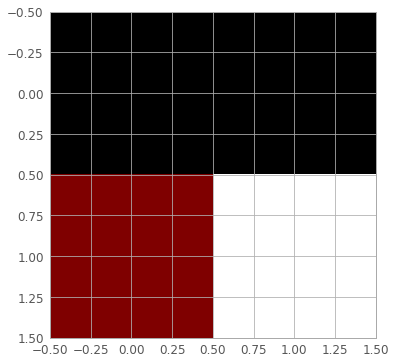

In [38]:
a1=np.array([[0,0],[200,30]])
a2= np.array([[0,0],[1,20]])
x=a1*a2
print(x)
plt.imshow(a1*a2)

PT2:
Find a way to concatanate the images together in three frames (continuum, inclination, Bz). 
Start by doing this for the first two data files
Then write a loop to extend this for all 59 files. 

In [39]:
#img2 = Image.new("RGB", (384, 240), "white")
#img2.paste(data_conti, (0, 0))
#img2.paste(Bz,(120,0))

[[0 0]
 [0 0]]


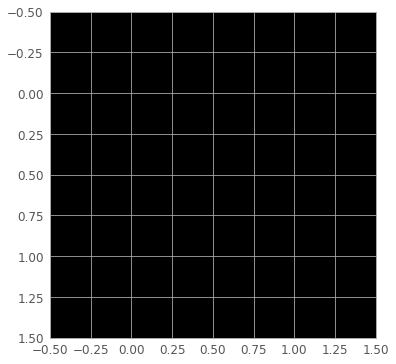

In [40]:
a4=np.array([[0,0],[0,0]])
a5= np.array([[0,0],[0,0]])
x=a4*a5
print(x)
plt.imshow(a4*a5)

Resources:
https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
https://www.delftstack.com/howto/python/opencv-combine-images/
https://stackoverflow.com/questions/65342361/photos-side-by-side *******

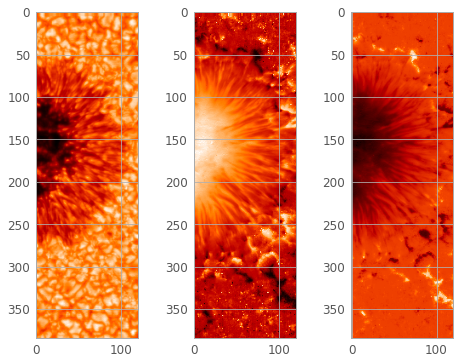

In [64]:
from PIL import Image, ImageOps, ImageDraw

fig, ax = plt.subplots(1, 3)

# Open input images and annotate
#im1 = Image.open(data_conti)    # 600x600 red
ax[0].imshow(data_conti)
ax[1].imshow(data_magincl)
ax[2].imshow(Bz)

In [54]:
data_conti.shape

(384, 120)

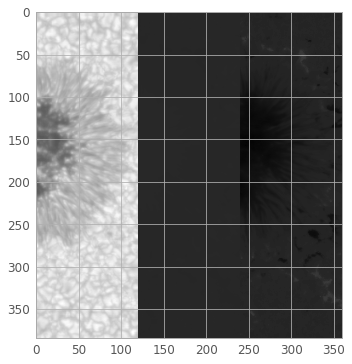

In [70]:
new = np.concatenate((data_conti, data_magincl, Bz), axis=1)
plt.imshow(new, cmap="gray")